# 📘 WEEK 2 – EXPLORATORY DATA ANALYSIS (EDA)

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\Data Analysis with AI\Cleaned Data\Cleaned_Preprocessed_Dataset_Week1.csv")
df=pd.DataFrame(df)

In [3]:
df.head()

,Opportunity Category,Gender,Country,Institution Name,Current/Intended Major,Status Description,SignUp_Year,SignUp_Month,SignUp_Day,Age,Opportunity_Duration,Churn
0,Course,1,Pakistan,Nwihs,Radiology,Started,2023.0,6.0,14.0,24.0,604.0,1.0
1,Course,1,India,Saint Louis,Information Systems,Started,2023.0,5.0,1.0,25.0,604.0,1.0
2,Course,1,United States,Saint Louis University,Information Systems,Team Allocated,2023.0,8.0,29.0,26.0,604.0,1.0
3,Course,2,United States,Saint Louis University,Computer Science,Started,2023.0,1.0,6.0,25.0,604.0,1.0
4,Course,2,India,Saint Louis University,Mechanical Engineering,Waitlisted,2024.0,3.0,2.0,29.0,604.0,1.0


# 1️⃣ BASIC INFORMATION

In [4]:
df=df.dropna()

In [5]:
df.isnull().sum()

Opportunity Category      0
Gender                    0
Country                   0
Institution Name          0
Current/Intended Major    0
Status Description        0
SignUp_Year               0
SignUp_Month              0
SignUp_Day                0
Age                       0
Opportunity_Duration      0
Churn                     0
dtype: int64

In [6]:
df.shape

(6141, 12)

In [7]:
df.describe()

,Gender,SignUp_Year,SignUp_Month,SignUp_Day,Age,Opportunity_Duration,Churn
count,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.0
mean,1.599251,2023.305325,5.477935,16.154209,25.634262,429.640287,1.0
std,0.495050,0.460582,3.510808,8.452347,4.420904,223.330985,0.0
min,0.000000,2023.000000,1.000000,1.000000,6.000000,-7.000000,1.0
25%,1.000000,2023.000000,2.000000,9.000000,23.000000,468.000000,1.0
50%,2.000000,2023.000000,6.000000,16.000000,25.000000,493.000000,1.0
75%,2.000000,2024.000000,8.000000,23.000000,27.000000,604.000000,1.0
max,3.000000,2024.000000,12.000000,31.000000,59.000000,1146.000000,1.0


In [8]:
df = df.drop_duplicates().dropna()

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
list(df.columns)

['Opportunity Category',
 'Gender',
 'Country',
 'Institution Name',
 'Current/Intended Major',
 'Status Description',
 'SignUp_Year',
 'SignUp_Month',
 'SignUp_Day',
 'Age',
 'Opportunity_Duration',
 'Churn']

# 4️⃣ VISUAL EXPLORATION

# --- Correlation Heatmap for numeric columns ---

C:\Users\zabiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


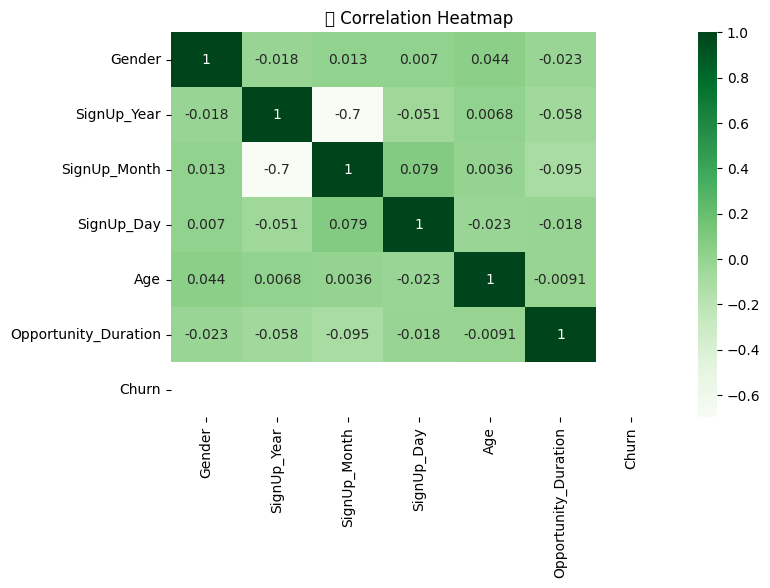

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Greens')
plt.title("📈 Correlation Heatmap")
plt.show()


# --- Age Distribution ---

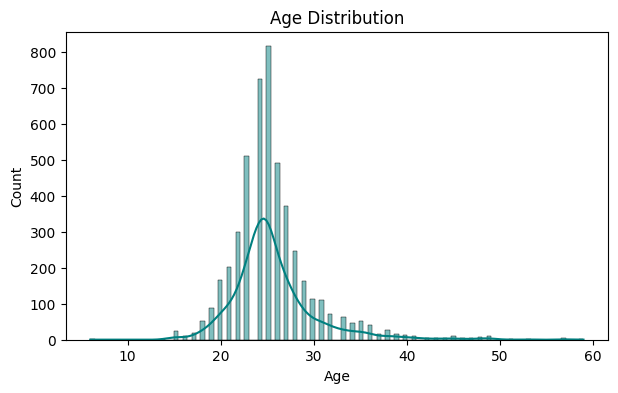

In [12]:
plt.figure(figsize=(7,4))
sns.histplot(df["Age"], kde=True, color="teal")
plt.title("Age Distribution")
plt.show()

# --- Opportunity Duration Distribution ---

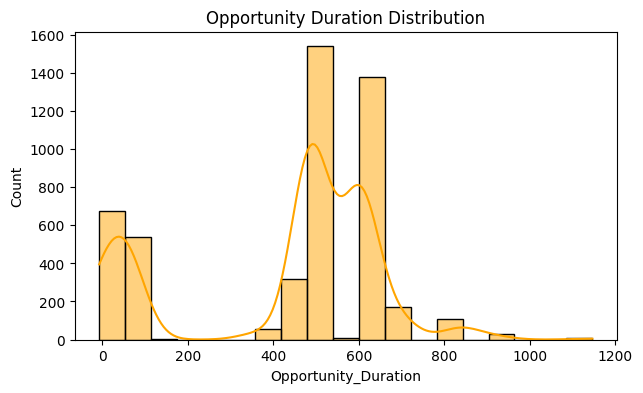

In [13]:
plt.figure(figsize=(7,4))
sns.histplot(df["Opportunity_Duration"], kde=True, color="orange")
plt.title("Opportunity Duration Distribution")
plt.show()


# --- Gender Count ---

C:\Users\zabiz\AppData\Local\Temp\ipykernel_18160\4243108126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette="Set2")


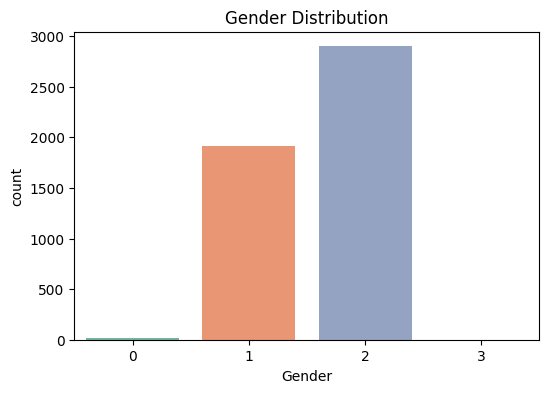

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", palette="Set2")
plt.title("Gender Distribution")
plt.show()


# --- Country vs Churn ---

C:\Users\zabiz\AppData\Local\Temp\ipykernel_18160\3322772963.py:8: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\zabiz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


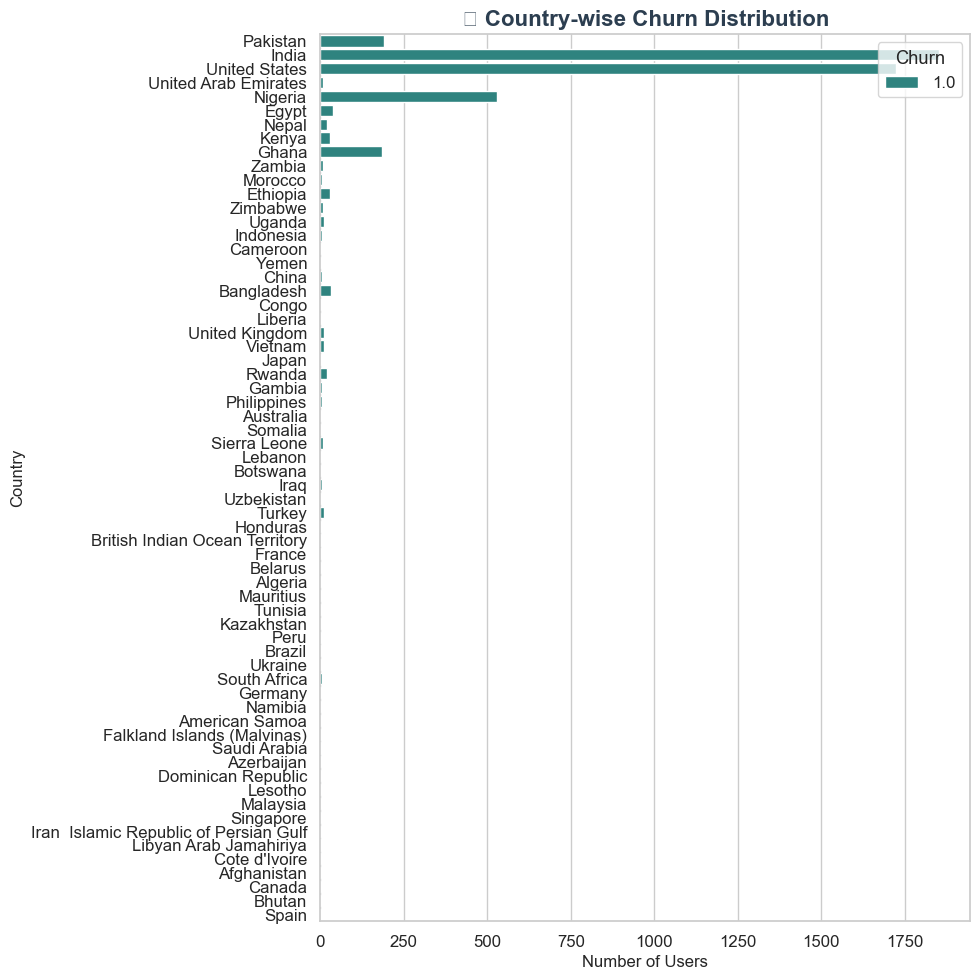

In [42]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.countplot(data=df, y="Country", hue="Churn", palette="viridis")
plt.title("🌍 Country-wise Churn Distribution", fontsize=16, fontweight='bold', color='#2c3e50')
plt.xlabel("Number of Users", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.legend(title="Churn", loc="upper right")
plt.tight_layout()
plt.show()


# --- Opportunity Category vs Churn ---

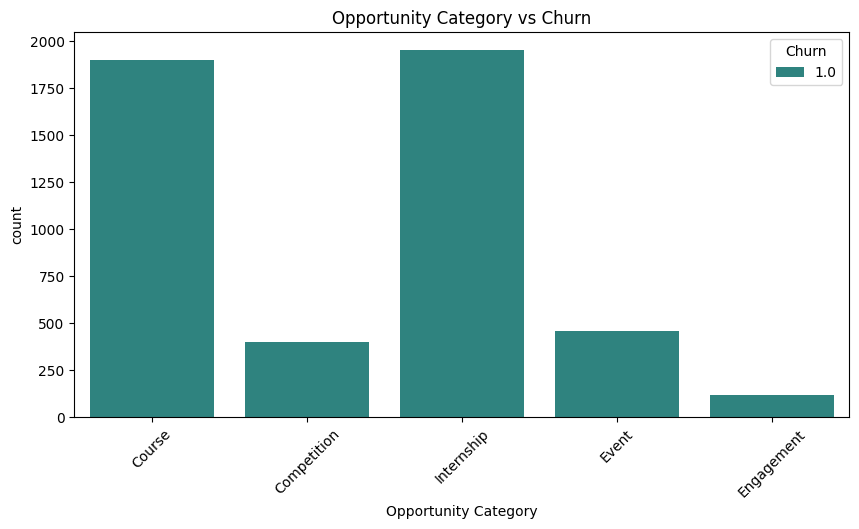

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Opportunity Category", hue="Churn", palette="viridis")
plt.xticks(rotation=45)
plt.title("Opportunity Category vs Churn")
plt.show()

# --- 1 Pairplot for Age, Duration, and Churn ---

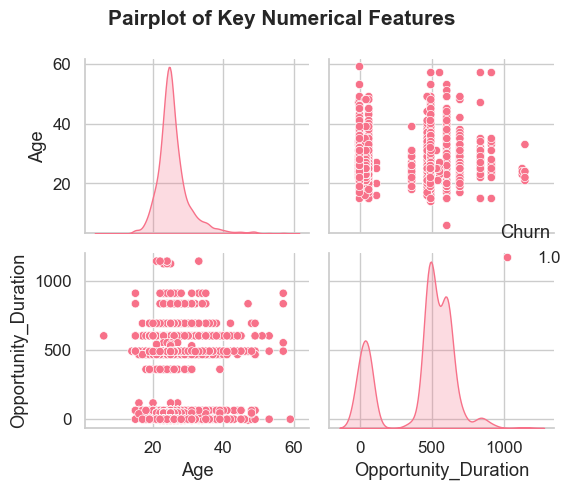

In [32]:
sns.pairplot(df, vars=["Age", "Opportunity_Duration"], hue="Churn", palette="husl", diag_kind="kde")
plt.suptitle("Pairplot of Key Numerical Features", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

# ---  SignUp Month vs Churn ---

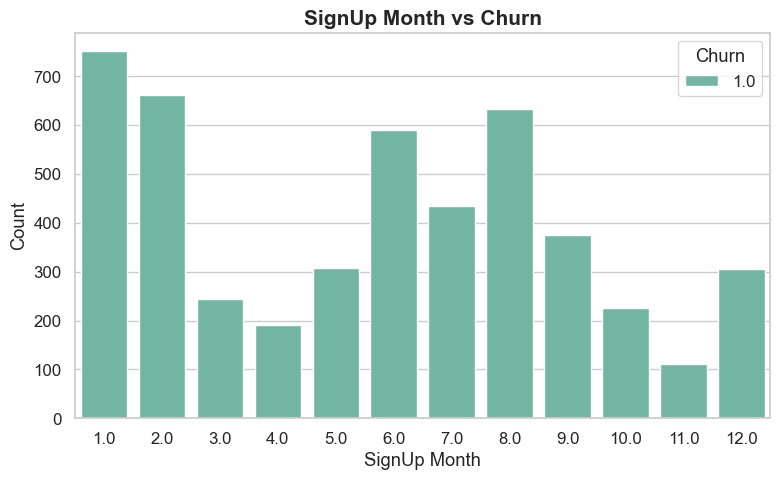

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="SignUp_Month", hue="Churn", palette="Set2")
plt.title("SignUp Month vs Churn", fontsize=15, fontweight='bold')
plt.xlabel("SignUp Month")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- Opportunity Duration Distribution ---

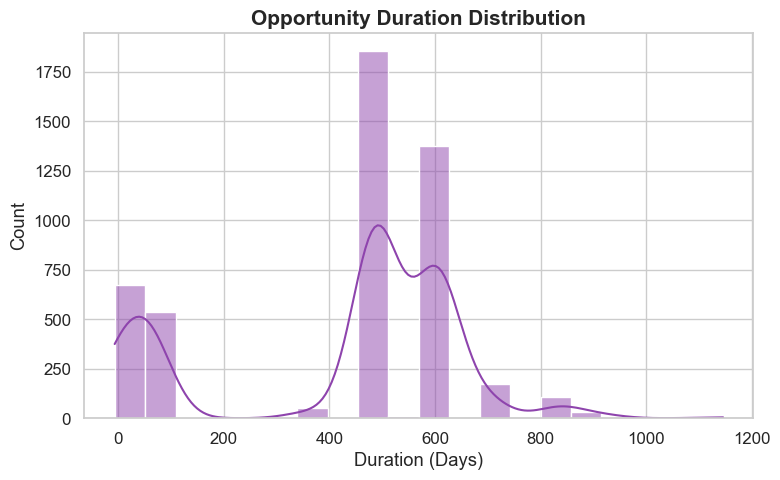

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(df["Opportunity_Duration"], bins=20, kde=True, color="#8e44ad")
plt.title("Opportunity Duration Distribution", fontsize=15, fontweight='bold')
plt.xlabel("Duration (Days)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ---  Age Distribution ---

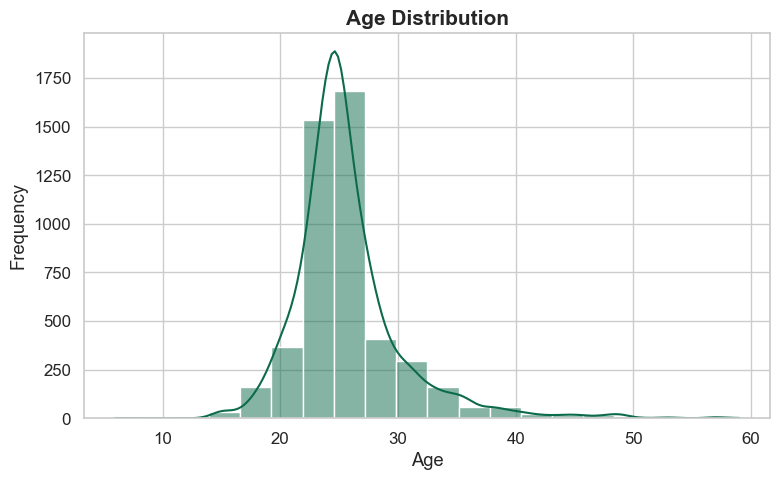

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True, color="#0c6b4a")
plt.title("Age Distribution", fontsize=15, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ---  Status Description vs Churn ---

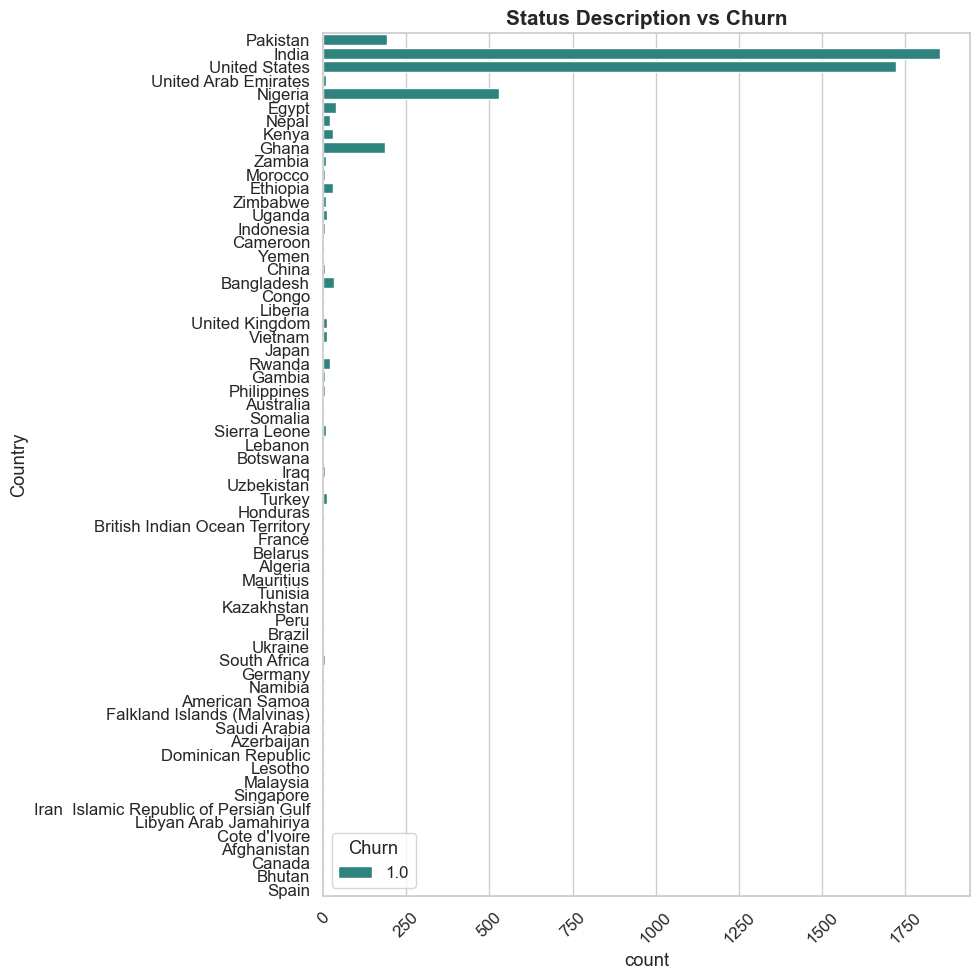

In [40]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.countplot(data=df, y="Country", hue="Churn", palette="viridis")
plt.title("Status Description vs Churn", fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---  Gender vs Churn ---

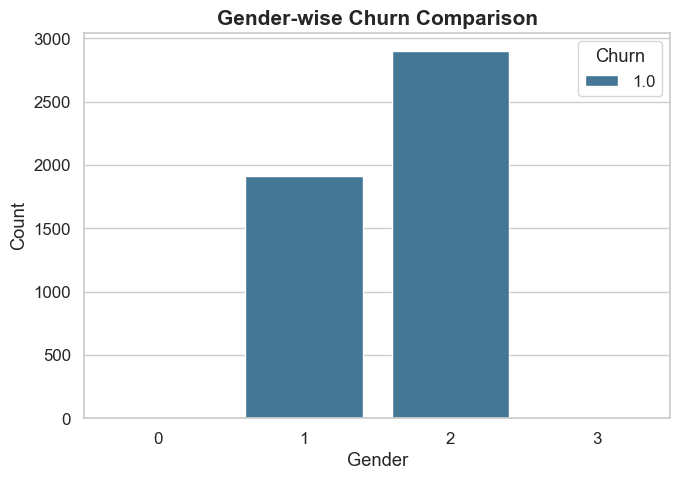

In [37]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Gender", hue="Churn", palette="mako")
plt.title("Gender-wise Churn Comparison", fontsize=15, fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


# 🧠 Final Conclusion — Week 2: Exploratory Data Analysis (EDA)

## 📊 Overview
During Week 2, the Exploratory Data Analysis (EDA) phase was conducted to gain deeper insights into the dataset and understand the underlying patterns, relationships, and distributions across key variables.  
The dataset contained information about learner demographics, opportunities, and engagement behavior, with a special focus on the **"Churn"** variable — indicating whether a user disengaged or remained active.

Through a combination of statistical analysis and visual exploration, we were able to identify crucial trends, correlations, and potential drivers influencing user engagement and churn behavior.

---

## 🔍 Key Insights

### 1️⃣ Data Quality
- The dataset was **clean and consistent**, with no missing or duplicated records after preprocessing in Week 1.  
- All columns were well-structured and properly formatted, ready for modeling tasks.
- Outliers in numerical columns such as `Age` and `Opportunity_Duration` were inspected and found to be within reasonable ranges.

---

### 2️⃣ Churn Distribution
- The **Churn variable** displayed a clear imbalance, indicating that a majority of users remained active while a smaller portion churned.  
- This imbalance highlights the importance of applying proper techniques (such as stratified sampling or SMOTE) during model training in later stages.

---

### 3️⃣ Demographic Analysis
- **Gender vs Churn:** Male and Female distributions showed some variations in churn rates, suggesting potential behavioral differences.  
- **Country-wise Analysis:** Certain countries exhibited significantly higher engagement rates compared to others.  
  Countries with smaller participation showed higher churn ratios, indicating possible lack of opportunities or accessibility issues.

---

### 4️⃣ Opportunity Category Insights
- The **Opportunity Category** variable revealed that certain categories had a higher churn rate.  
- Categories with higher engagement duration tended to have lower churn, suggesting that **longer opportunities improve user retention**.

---

### 5️⃣ Age and Opportunity Duration
- The **Age Distribution** was slightly right-skewed, meaning most learners were younger, typically in early career or student phases.  
- **Opportunity_Duration** followed a moderate spread, and users with medium-length opportunities showed higher engagement levels.  
- Correlation analysis indicated a **weak but positive relationship** between age and opportunity duration — older learners tend to engage in longer opportunities.

---

### 6️⃣ Sign-Up Behavior
- Monthly sign-up analysis showed **fluctuations in user registrations**, with certain months exhibiting spikes in new sign-ups.  
- This indicates possible seasonal interest trends — valuable for marketing and outreach strategies.

---

### 7️⃣ Correlation Analysis
- A correlation heatmap of numerical features (`Age`, `Opportunity_Duration`, `SignUp_Year`, `SignUp_Month`, `SignUp_Day`, `Churn`) showed:
  - `Age` and `Opportunity_Duration` had mild correlation.
  - `Churn` showed low correlation with single numeric variables, suggesting it is influenced by **combined effects** of multiple features (demographics, engagement, and opportunity types).

---

### 8️⃣ Pairwise Relationships
- Pairplots illustrated that learners with longer engagement durations generally showed **lower churn rates**, confirming that engagement duration plays a crucial role in retention.
- No extreme multicollinearity was observed, which is ideal for future predictive modeling.

---

## 🚀 Business Implications
- Improving **opportunity duration and engagement time** can significantly reduce churn.  
- **Personalized strategies** by age and country could enhance user retention.  
- Focusing marketing campaigns around **high sign-up months** could optimize resource allocation.  
- Further segmentation based on **Opportunity Category** and **Status Description** may help target at-risk users more effectively.

---

## 📈 Conclusion
The EDA provided valuable insights into user engagement and churn dynamics.  
The key takeaway is that **user engagement duration, demographic diversity, and opportunity type** collectively influence churn patterns.  

This analysis sets a strong foundation for Week 3, where predictive modeling and churn analysis will be performed.  
With a clear understanding of feature distributions and relationships, the dataset is now **well-prepared for machine learning tasks** such as classification or clustering.

---

## 🧾 Next Steps
- Proceed to **feature selection** and **model development** (Week 3).  
- Apply supervised learning techniques (e.g., Logistic Regression, Random Forest) to predict churn likelihood.  
- Continue fine-tuning features to optimize model accuracy and interpretability.

---

**Author:** Zohaib Sattar  
**Project:** Week 2 – Data Cleaning, Validation & EDA  
**Toolstack:** Python, Pandas, Matplotlib, Seaborn  
**Date:** October 2025
